# Repetition Code Decoder

In [1]:
%load_ext autoreload
%autoreload 2

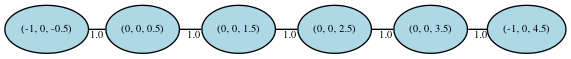

In [2]:
import sys
sys.path.insert(0, "../../")
from topological_codes import RepetitionGraphDecoder
decoder = RepetitionGraphDecoder({"d":5,"T":1})
G = decoder.S['Z']
decoder.draw(G)

Z Syndrome Graph to correct Z Flips
Error Graph


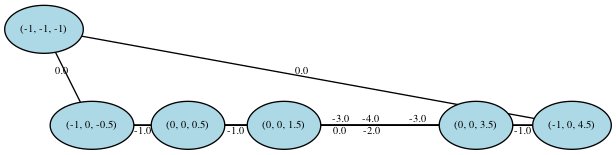

Matched Graph


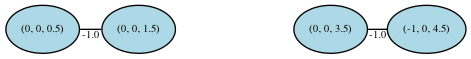

Matches: [((0, 0, 3.5), (-1, 0, 4.5)), ((0, 0, 0.5), (0, 0, 1.5))]

===



In [3]:
all_syndromes = {"Z": [(0,0,.5),(0,0,1.5),(0,0,3.5)]}
matches = {}

for syndrome_key, syndromes in all_syndromes.items():
    print(f"{syndrome_key} Syndrome Graph to correct {syndrome_key} Flips")
    error_graph = decoder._make_error_graph(syndromes,syndrome_key)
    print("Error Graph")
    decoder.draw(error_graph)
    matches[syndrome_key] = decoder._run_mwpm(error_graph)
    matched_graph = decoder._run_mwpm_graph(error_graph)
    print("Matched Graph")
    decoder.draw(matched_graph)
    print(f"Matches: {matches[syndrome_key]}")
    print("\n===\n")

#### Degeneracy Weighting 

When there are multiple shortest paths between syndrome nodes on a syndrome graph, the associated error chains are thought to be more probable. This degeneracy in some error chain `e` is denoted as `Ω(e)`, which in turn affects the probability of the entire error set `E` in which `e` is included. 

<img src="https://latex.codecogs.com/gif.latex?p(E) \propto (1-p)^n \prod_{e \in \text{chain}(E)} \Omega(e)\left(\frac{p}{1-p}\right)^{|e|}" /> 
<img src="https://latex.codecogs.com/gif.latex?p(E) \propto - \sum_{e \in \text{chain}(E)}\left\{ |e| - \Omega(e)\left(\frac{p}{1-p}\right)^{|e|}\right\}" /> 

The aformentioned `error_graph` now edge weights (formerly `-|e|`) increased by degeneracy counts as shown above. A more detailed derivation can be found in reference [1](https://arxiv.org/abs/1709.02154).

As shown below, an `error_graph` under degeneracy considerations has adjusted edge weights.


Z Syndrome Graph to correct Z Flips
Error Graph


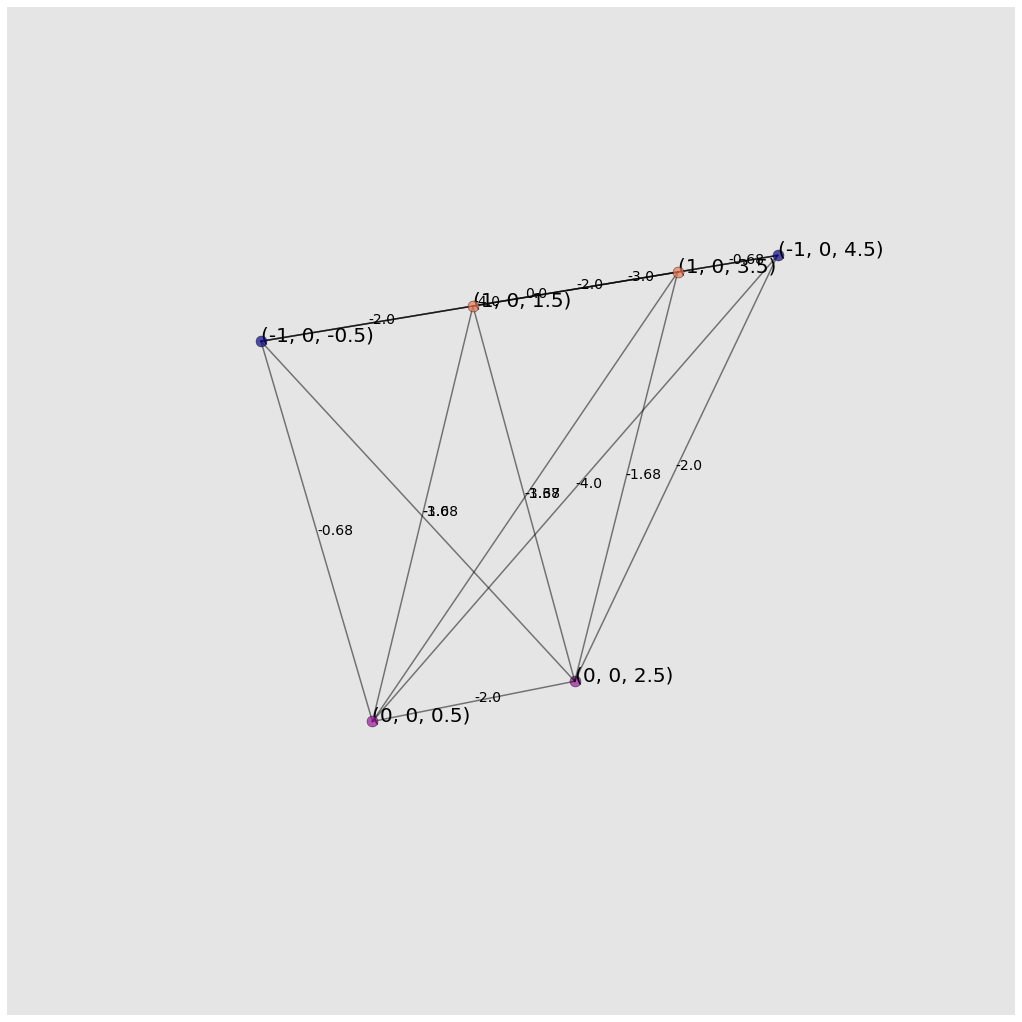

Matched Graph


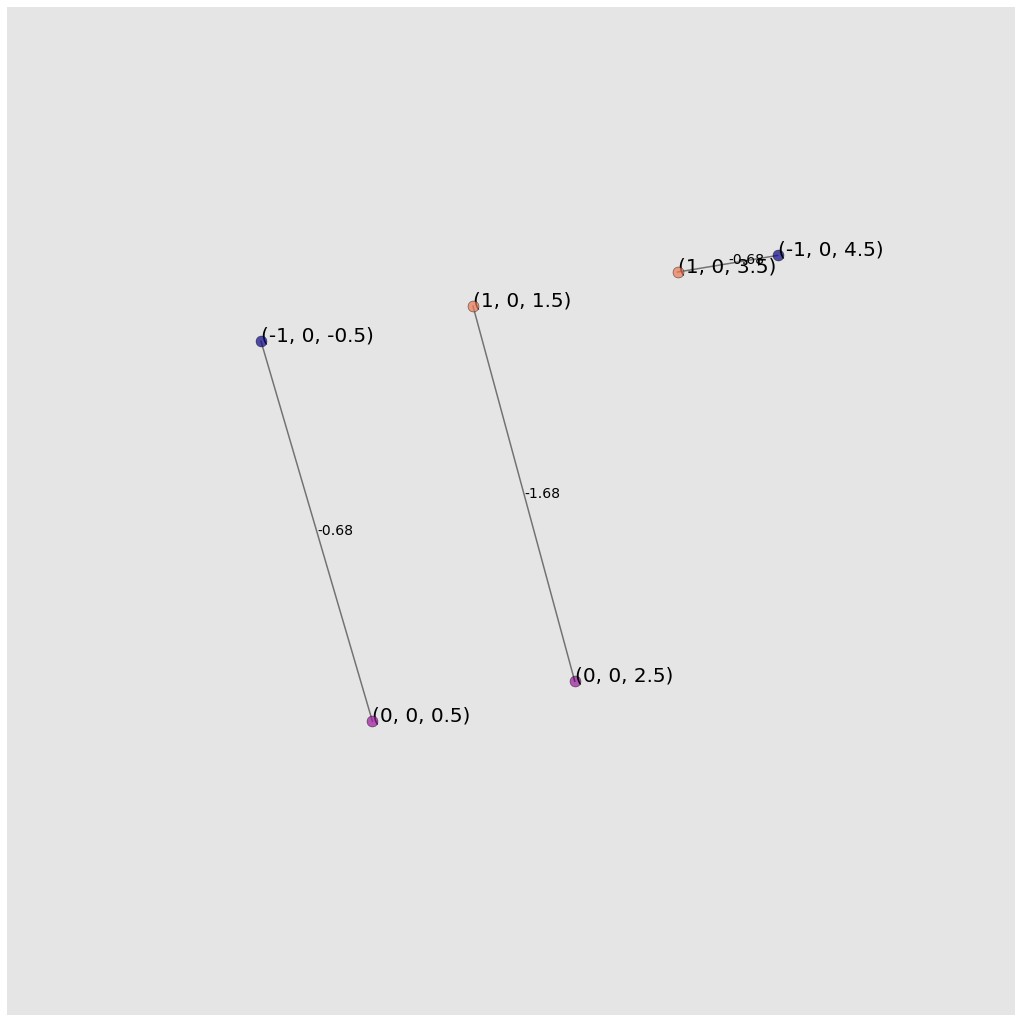

Matches: [((-1, 0, 4.5), (1, 0, 3.5)), ((-1, 0, -0.5), (0, 0, 0.5)), ((0, 0, 2.5), (1, 0, 1.5))]

===



In [4]:
decoder = RepetitionGraphDecoder({"d":5,"T":3})
p = 0.1
    
all_syndromes = {"Z": [(0,0,0.5),(0,0,2.5),(1,0,1.5),(1,0,3.5)]}
matches = {}

for syndrome_key, syndromes in all_syndromes.items():
    print(f"{syndrome_key} Syndrome Graph to correct {syndrome_key} Flips")
    error_graph = decoder._make_error_graph(syndromes,syndrome_key, err_prob=p)
    print("Error Graph")
    decoder.draw(error_graph)
    matches[syndrome_key] = decoder._run_mwpm(error_graph, floats=True)
    matched_graph = decoder._run_mwpm_graph(error_graph, floats=True)
    print("Matched Graph")
    decoder.draw(matched_graph)
    print(f"Matches: {matches[syndrome_key]}")
    print("\n===\n")

### Multi-step Surface Code Decoder, T > 1

In the case of `T > 1`, the syndrome graph will be propelled into three dimensions, including time. Edges between syndrome nodes at the same time index in this `3D` syndrome graph still correspond to data qubit errors, while edges between the **same** syndrome node at adjecent time indices (these are the only edges that exist between syndrome nodes of different time indices [[2]](http://arxiv.org/abs/0905.0531v1)) correspond to ancilla qubit errors, also known as syndrome measurement errors. 

Consider a `Z` syndrome detected at syndrome node `(0,0.5,0.5)` and another `Z` syndrome detected at node `(1,0.5,0.5)`. The most probable propsective error would be that the ancilla qubit measuring the syndrome node at location `(0.5,0.5)` incurred a measurement error at time `t = 0`. Then, at time `t=1`, that same ancilla qubit detected no error in nearby data qubits and measured another `Z` syndrome simply because its state changed between time step `t = 0` and time step `t = 1`. This is reminiscent of the bitwise OR notation found in repitition code quantum circuits.

The associated syndrome graphs of `RepetitionGraphDecoder(d=5,T=3)` can be beautifully visualized using the `RepetitionGraphDecoder.graph_2D` and `RepetitionGraphDecoder.graph_3D` functions shown below. It should be noted that outside of a `jupyter` notebook **these 3D graphs are rotatable**. 

You can see an example schematic from the following paper:

<p align="center">
<img width="700" alt="Screen Shot 2020-07-01 at 3 54 32 PM" src="https://user-images.githubusercontent.com/293681/86285739-286d1900-bbb3-11ea-957e-c38ad1563498.png">
</p>

* Wang, D. S., Fowler, A. G., Stephens, A. M. & Hollenberg, L. C. L. Threshold error rates for the toric and surface codes. arXiv:0905.0531 [quant-ph] (2009).


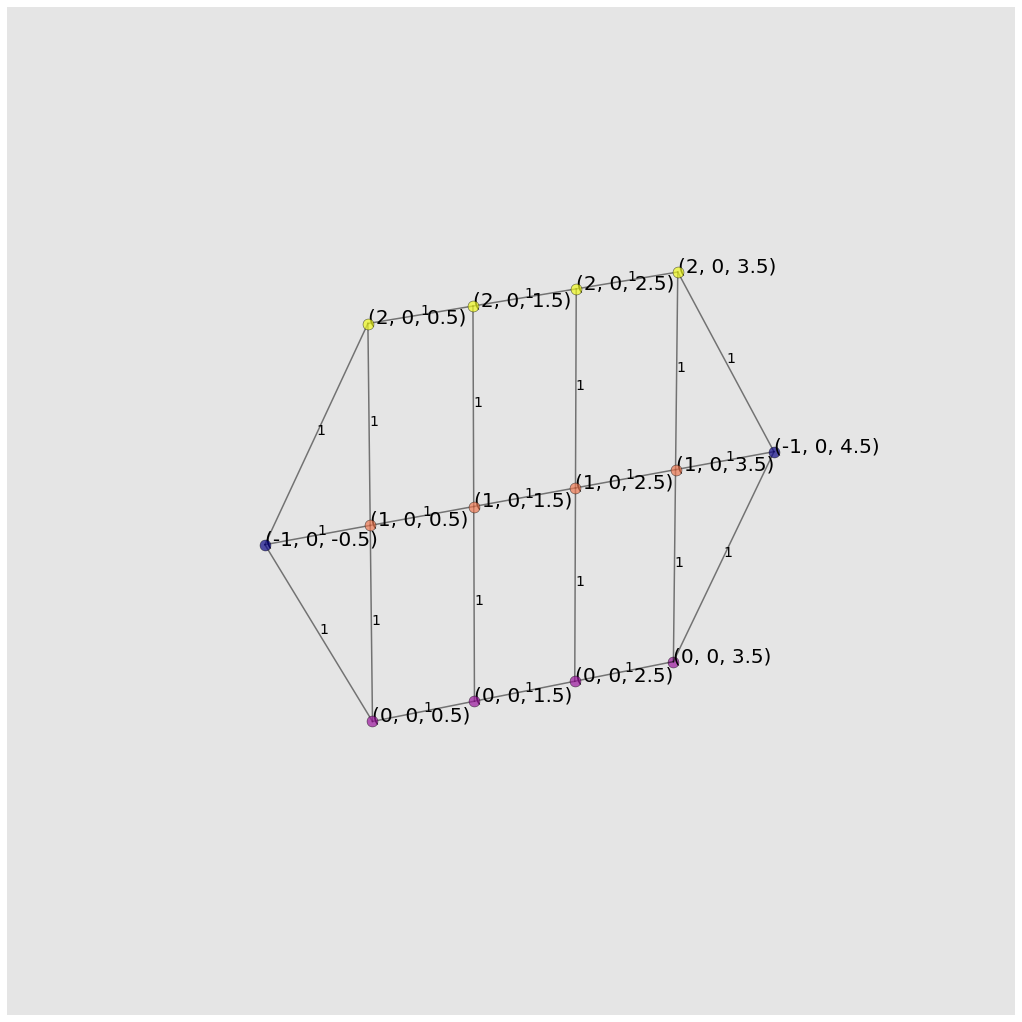

In [5]:
decoder = RepetitionGraphDecoder({"d":5,"T":3})
G = decoder.S['Z']
decoder.draw(G)

The syndrome nodes in pink, orange, and yellow represent **real** syndrome nodes from times `t = 0,1,2` respectively, as denoted by their labels. The syndrome nodes in dark blue denote **virtual** syndrome nodes, as denoted by their `t = -1` time index. Below, a set of example syndrome node measurements are used to find the most probable error set on a Surface Code with `d = 5` and `T = 3`.

Z Syndrome Graph to correct Z Flips
Error Graph


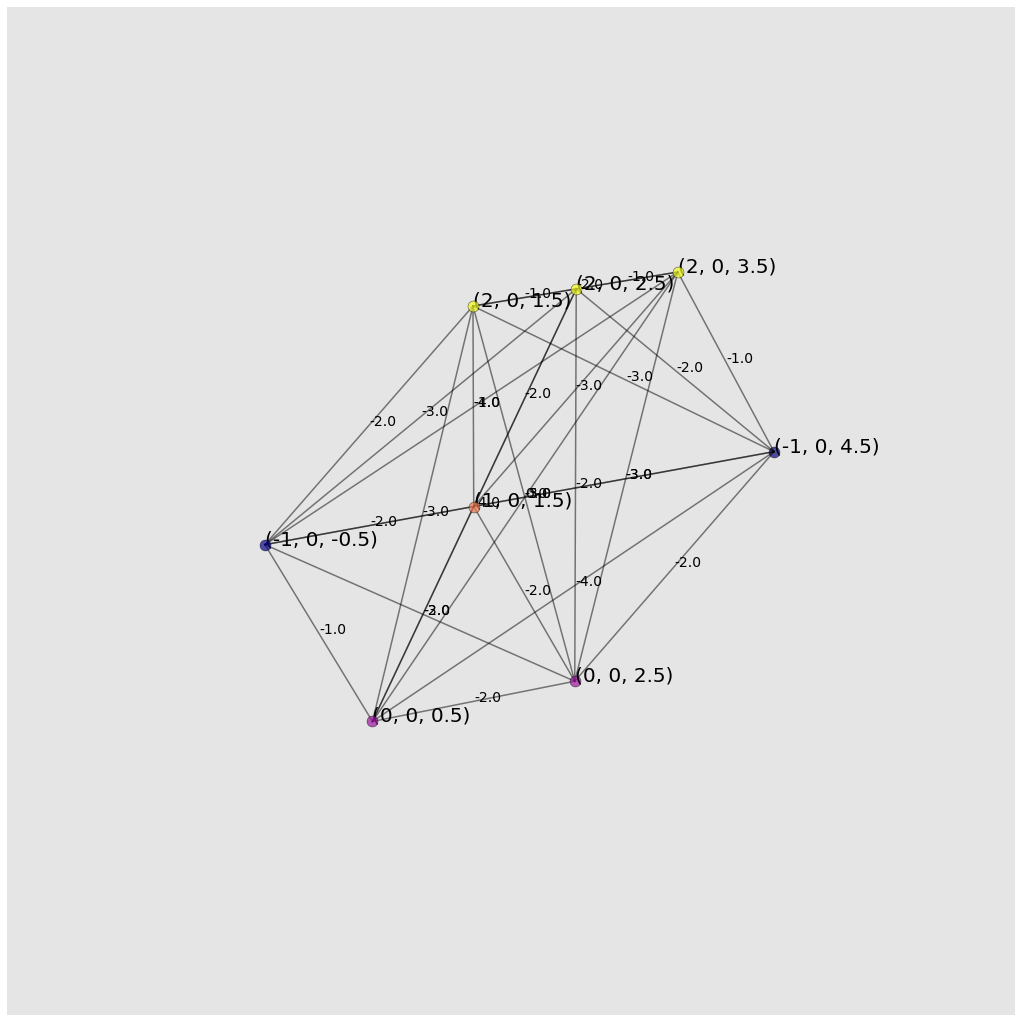

Matched Graph


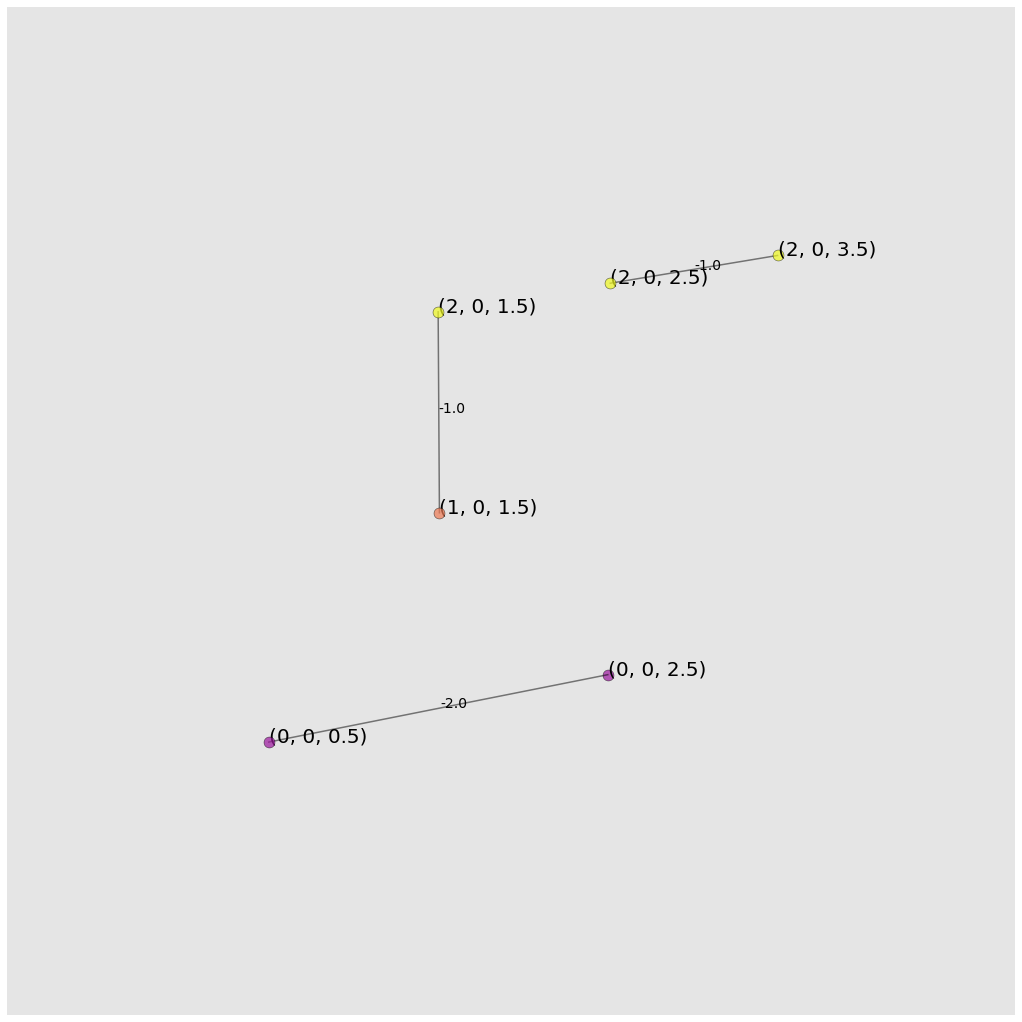

Matches: [((0, 0, 0.5), (0, 0, 2.5)), ((2, 0, 1.5), (1, 0, 1.5)), ((2, 0, 2.5), (2, 0, 3.5))]

===



In [6]:
p = None
all_syndromes = {"Z": [(0,0,.5),(0,0,2.5), (1,0,1.5),(2,0,1.5), (2,0,2.5), (2,0,3.5)],}
matches = {}

for syndrome_key, syndromes in all_syndromes.items():
    print(f"{syndrome_key} Syndrome Graph to correct {syndrome_key} Flips")
    error_graph = decoder._make_error_graph(syndromes,syndrome_key, err_prob=p)
    print("Error Graph")
    decoder.draw(error_graph)
    matches[syndrome_key] = decoder._run_mwpm(error_graph)
    matched_graph = decoder._run_mwpm_graph(error_graph)
    print("Matched Graph")
    decoder.draw(matched_graph)
    print(f"Matches: {matches[syndrome_key]}")
    print("\n===\n")


Here is another longer example with `d = 9` and `T = 3` with more colorful graphs detailing each step of the decoding process. This is an optional example for the curious reader. 

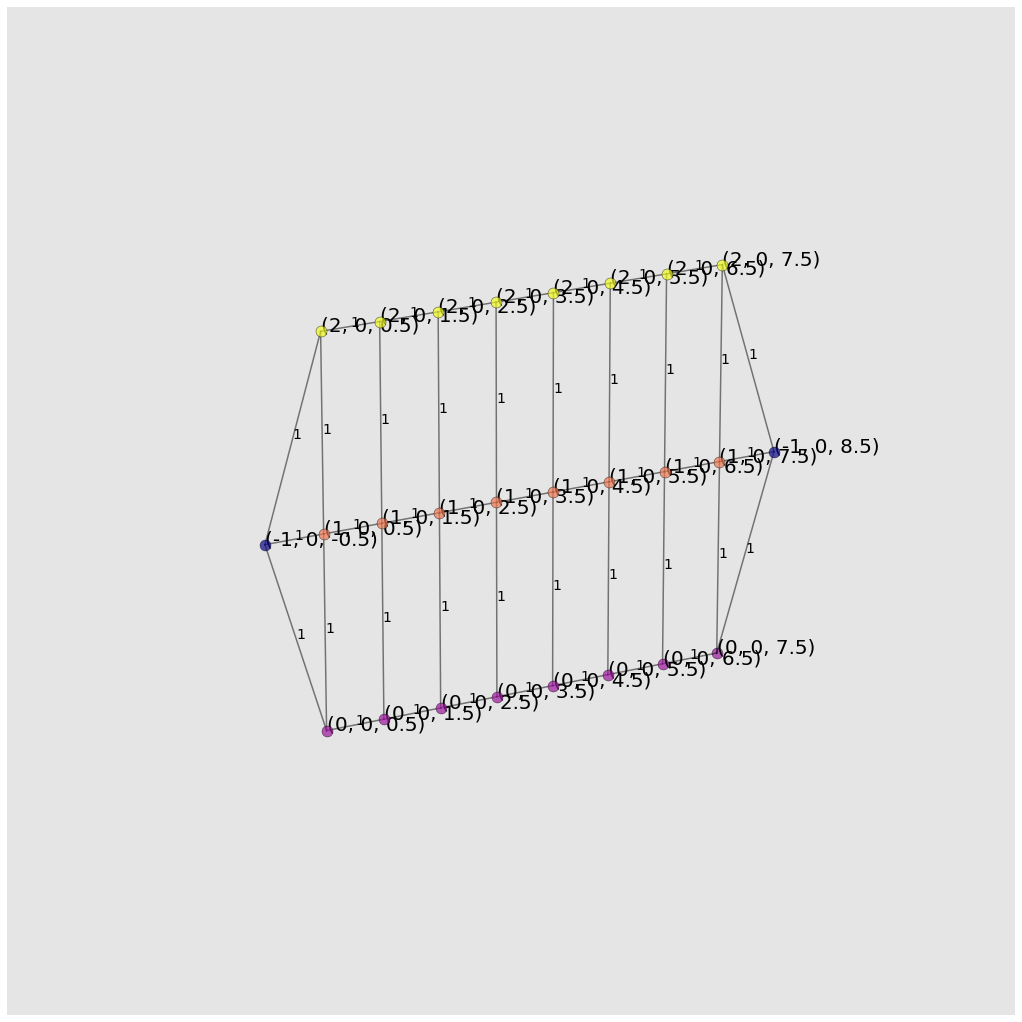

In [7]:
decoder = RepetitionGraphDecoder({"d":9,"T":3})
G = decoder.S['Z']
decoder.draw(G)

Thanks for reading!!